<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p3_AgrupamentoHierarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preliminaries

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


In [ ]:
data_src = pd.read_pickle('alemPena-p2.pickle')

In [ ]:
data_num = data_src.to_numpy()

#Hierarchical Clustering

In [ ]:
# https://www.computersciencemaster.com.br/2019/02/aula-03-agrupamento-hierarquico.html


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial import distance_matrix

In [ ]:
# funcao para recuperar id da coluna desejada como label no metodo abaixo, dendrogram()
def llf(id):
  return data_src.iloc[id].values[0]

## Agglomerative

In [ ]:
# chebyshev cityblock cosine euclidean hamming jaccard mahalanobis minkowski
hcMetric='chebyshev'
# single complete ward average
hcMetodo='complete'
# GeneroReu ou CondSocialCirc
hcClasse='CondSocialCirc'

In [ ]:
maxIter = 30

ext=[0.0]*maxIter
acc=[0.0]*maxIter
arc=[0.0]*maxIter
sls=[0.0]*maxIter
chs=[0.0]*maxIter
mis=[0.0]*maxIter
fms=[0.0]*maxIter

In [ ]:

for i in range(maxIter): 

    t0 = time.time()

    hca = AgglomerativeClustering(n_clusters=3, linkage=hcMetodo, affinity=hcMetric)
    y_hc = hca.fit_predict(data_num)
    linkHC = linkage(data_num, method=hcMetodo, metric=hcMetric)

    t1 = time.time()

    ext[i]=(t1-t0)
    acc[i]=metrics.accuracy_score(data_src[hcClasse], y_hc)
    arc[i]=metrics.adjusted_rand_score(data_src[hcClasse], y_hc)
    sls[i]=metrics.silhouette_score(data_src, y_hc, metric=hcMetric)
    chs[i]=metrics.calinski_harabasz_score(data_src, y_hc)
    mis[i]=metrics.mutual_info_score(data_src[hcClasse], y_hc)
    fms[i]=metrics.fowlkes_mallows_score(data_src[hcClasse], y_hc)


In [ ]:
hca.n_clusters_, hca.n_leaves_, hca.n_components_, hca.n_connected_components_, hca.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:102: FutureWarning: The ``n_components_`` attribute was deprecated in favor of ``n_connected_components_`` in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)


(3,
 606,
 1,
 1,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [ ]:
hca.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='chebyshev', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)>

## Performance analysis

In [ ]:
print("linkage:",hca.linkage,"- metric:", hca.affinity)

print("ExecTime mean: ",np.mean(ext))
print("Accuracy mean: ",np.mean(acc))
print("Rand Score mean: ",np.mean(arc))
print("Silhouette mean: ",np.mean(sls))
print("Calinki-Harabasz mean: ",np.mean(chs))
print("Mutual Info mean: ",np.mean(mis))
print("Fowlkes Mallows mean: ",np.mean(fms))

print("\nExecTime median: ",np.median(ext))
print("Accuracy median: ",np.median(acc))
print("Rand Score median: ",np.median(arc))
print("Silhouette median: ",np.median(sls))
print("Calinki-Harabasz median: ",np.median(chs))
print("Mutual Info median: ",np.median(mis))
print("Fowlkes Mallows median: ",np.median(fms))

print("\nExecTime Std: ",np.std(ext))
print("Accuracy Std: ",np.std(acc))
print("Rand Score Std: ",np.std(arc))
print("Silhouette Std: ",np.std(sls))
print("Calinki-Harabasz Std: ",np.std(chs))
print("Mutual Info Std: ",np.std(mis))
print("Fowlkes Mallows Std: ",np.std(fms))

linkage: complete - metric: chebyshev
ExecTime mean:  0.011154071489969889
Accuracy mean:  0.7706270627062709
Rand Score mean:  -0.07008806230015187
Silhouette mean:  0.04691889271352158
Calinki-Harabasz mean:  8.157494305826086
Mutual Info mean:  0.011235208070213377
Fowlkes Mallows mean:  0.78294165413693

ExecTime median:  0.010990023612976074
Accuracy median:  0.7706270627062707
Rand Score median:  -0.07008806230015187
Silhouette median:  0.04691889271352158
Calinki-Harabasz median:  8.157494305826088
Mutual Info median:  0.011235208070213373
Fowlkes Mallows median:  0.7829416541369297

ExecTime Std:  0.0004683259399466362
Accuracy Std:  2.220446049250313e-16
Rand Score Std:  0.0
Silhouette Std:  0.0
Calinki-Harabasz Std:  1.7763568394002505e-15
Mutual Info Std:  3.469446951953614e-18
Fowlkes Mallows Std:  2.220446049250313e-16


In [ ]:
y_hc

In [ ]:
from matplotlib import rcParams
import seaborn as sns

In [ ]:

default_font_size = rcParams['font.size']
rcParams['font.size'] = 20
rcParams['axes.labelsize']=20
rcParams['axes.titlesize']=20
rcParams['figure.figsize'] =(8.0, 5.5)

# ['Male','Female','Other']
categ = ['No','Yes','Other']

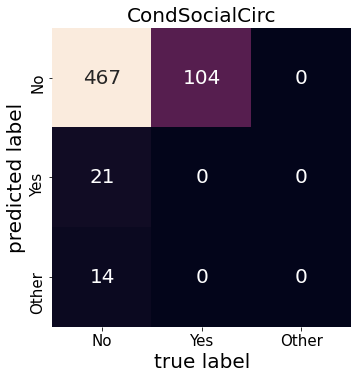

In [ ]:
mat = metrics.confusion_matrix(data_src[hcClasse], y_hc)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categ, yticklabels=categ)

plt.tick_params(labelsize=15)
plt.title(hcClasse)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
rcParams.values

<bound method Mapping.values of RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mat

##Visual Analysis

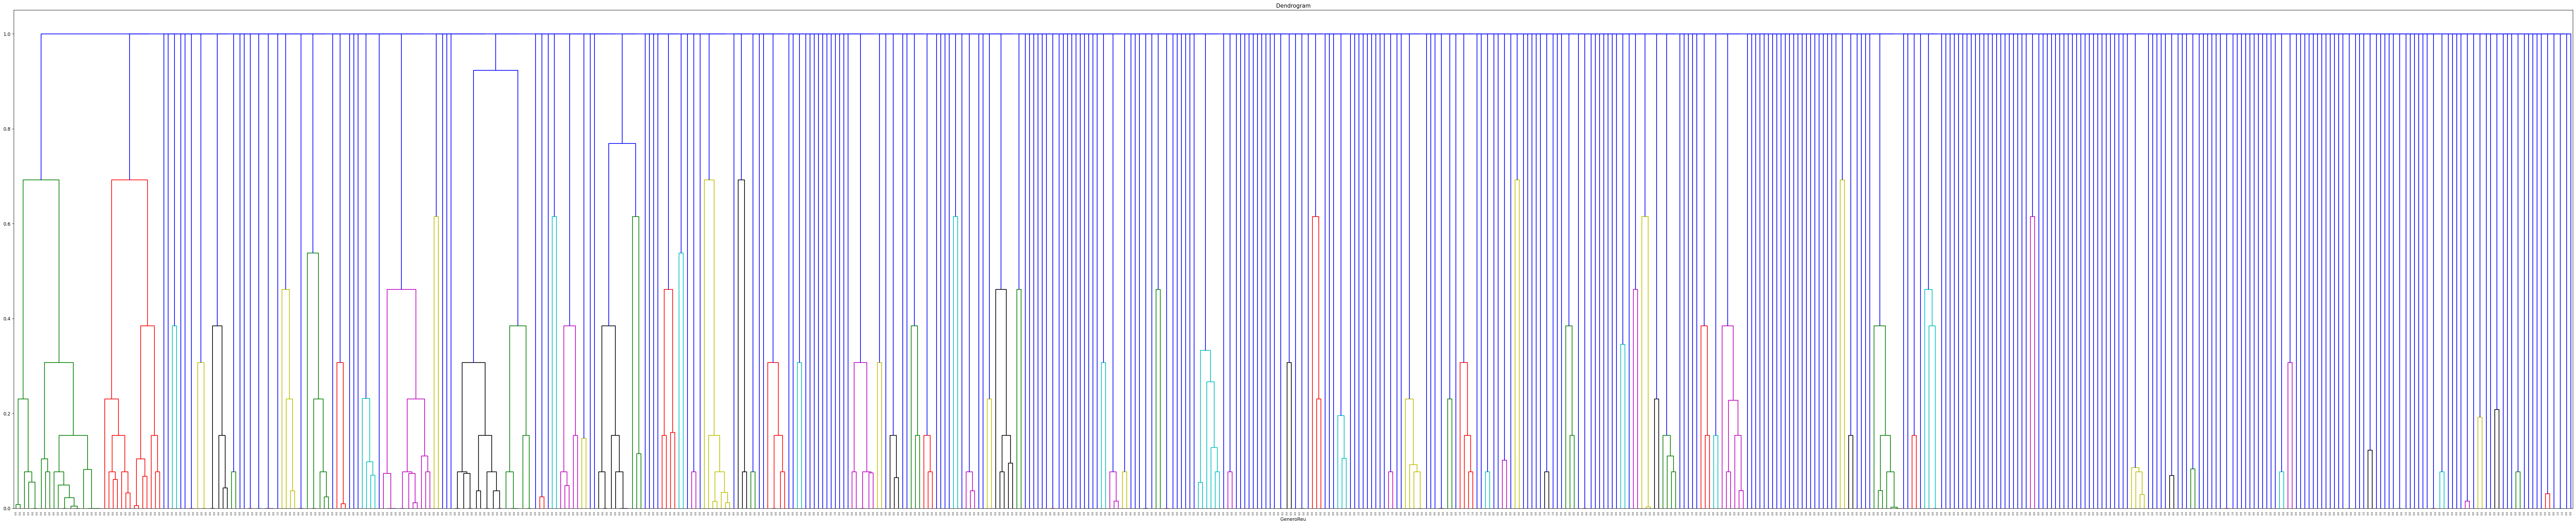

In [ ]:
plt.figure(figsize=(100,20),dpi=125)

dendro = dendrogram(linkHC, leaf_label_func=llf)

plt.title('Dendrogram')
plt.xlabel(hcClasse)
plt.show()

linkage : {"ward", "complete", "average", "single"}, default="ward"
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.

- ward minimizes the variance of the clusters being merged.
- average uses the average of the distances of each observation of
  the two sets.
- complete or maximum linkage uses the maximum distances between
  all observations of the two sets.
- single uses the minimum of the distances between all observations
  of the two sets.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

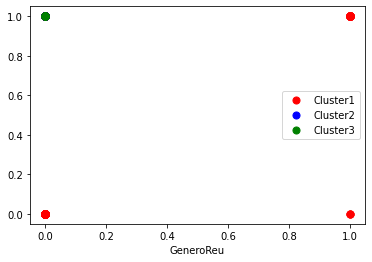

In [ ]:
# estratégia de apresentar pontos coloridos por cluster, para identificar organizacao espacial ou de separacao
# nao serve para estrutura do dataset atual: 31 colunas
plt.scatter(data_num[y_hc==0,0], data_num[y_hc==0,1], s=50, c='red', label='Cluster1')
plt.scatter(data_num[y_hc==1,0], data_num[y_hc==1,1], s=50, c='blue', label='Cluster2')
plt.scatter(data_num[y_hc==2,0], data_num[y_hc==2,1], s=50, c='green', label='Cluster3')

plt.xlabel(hcClasse)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


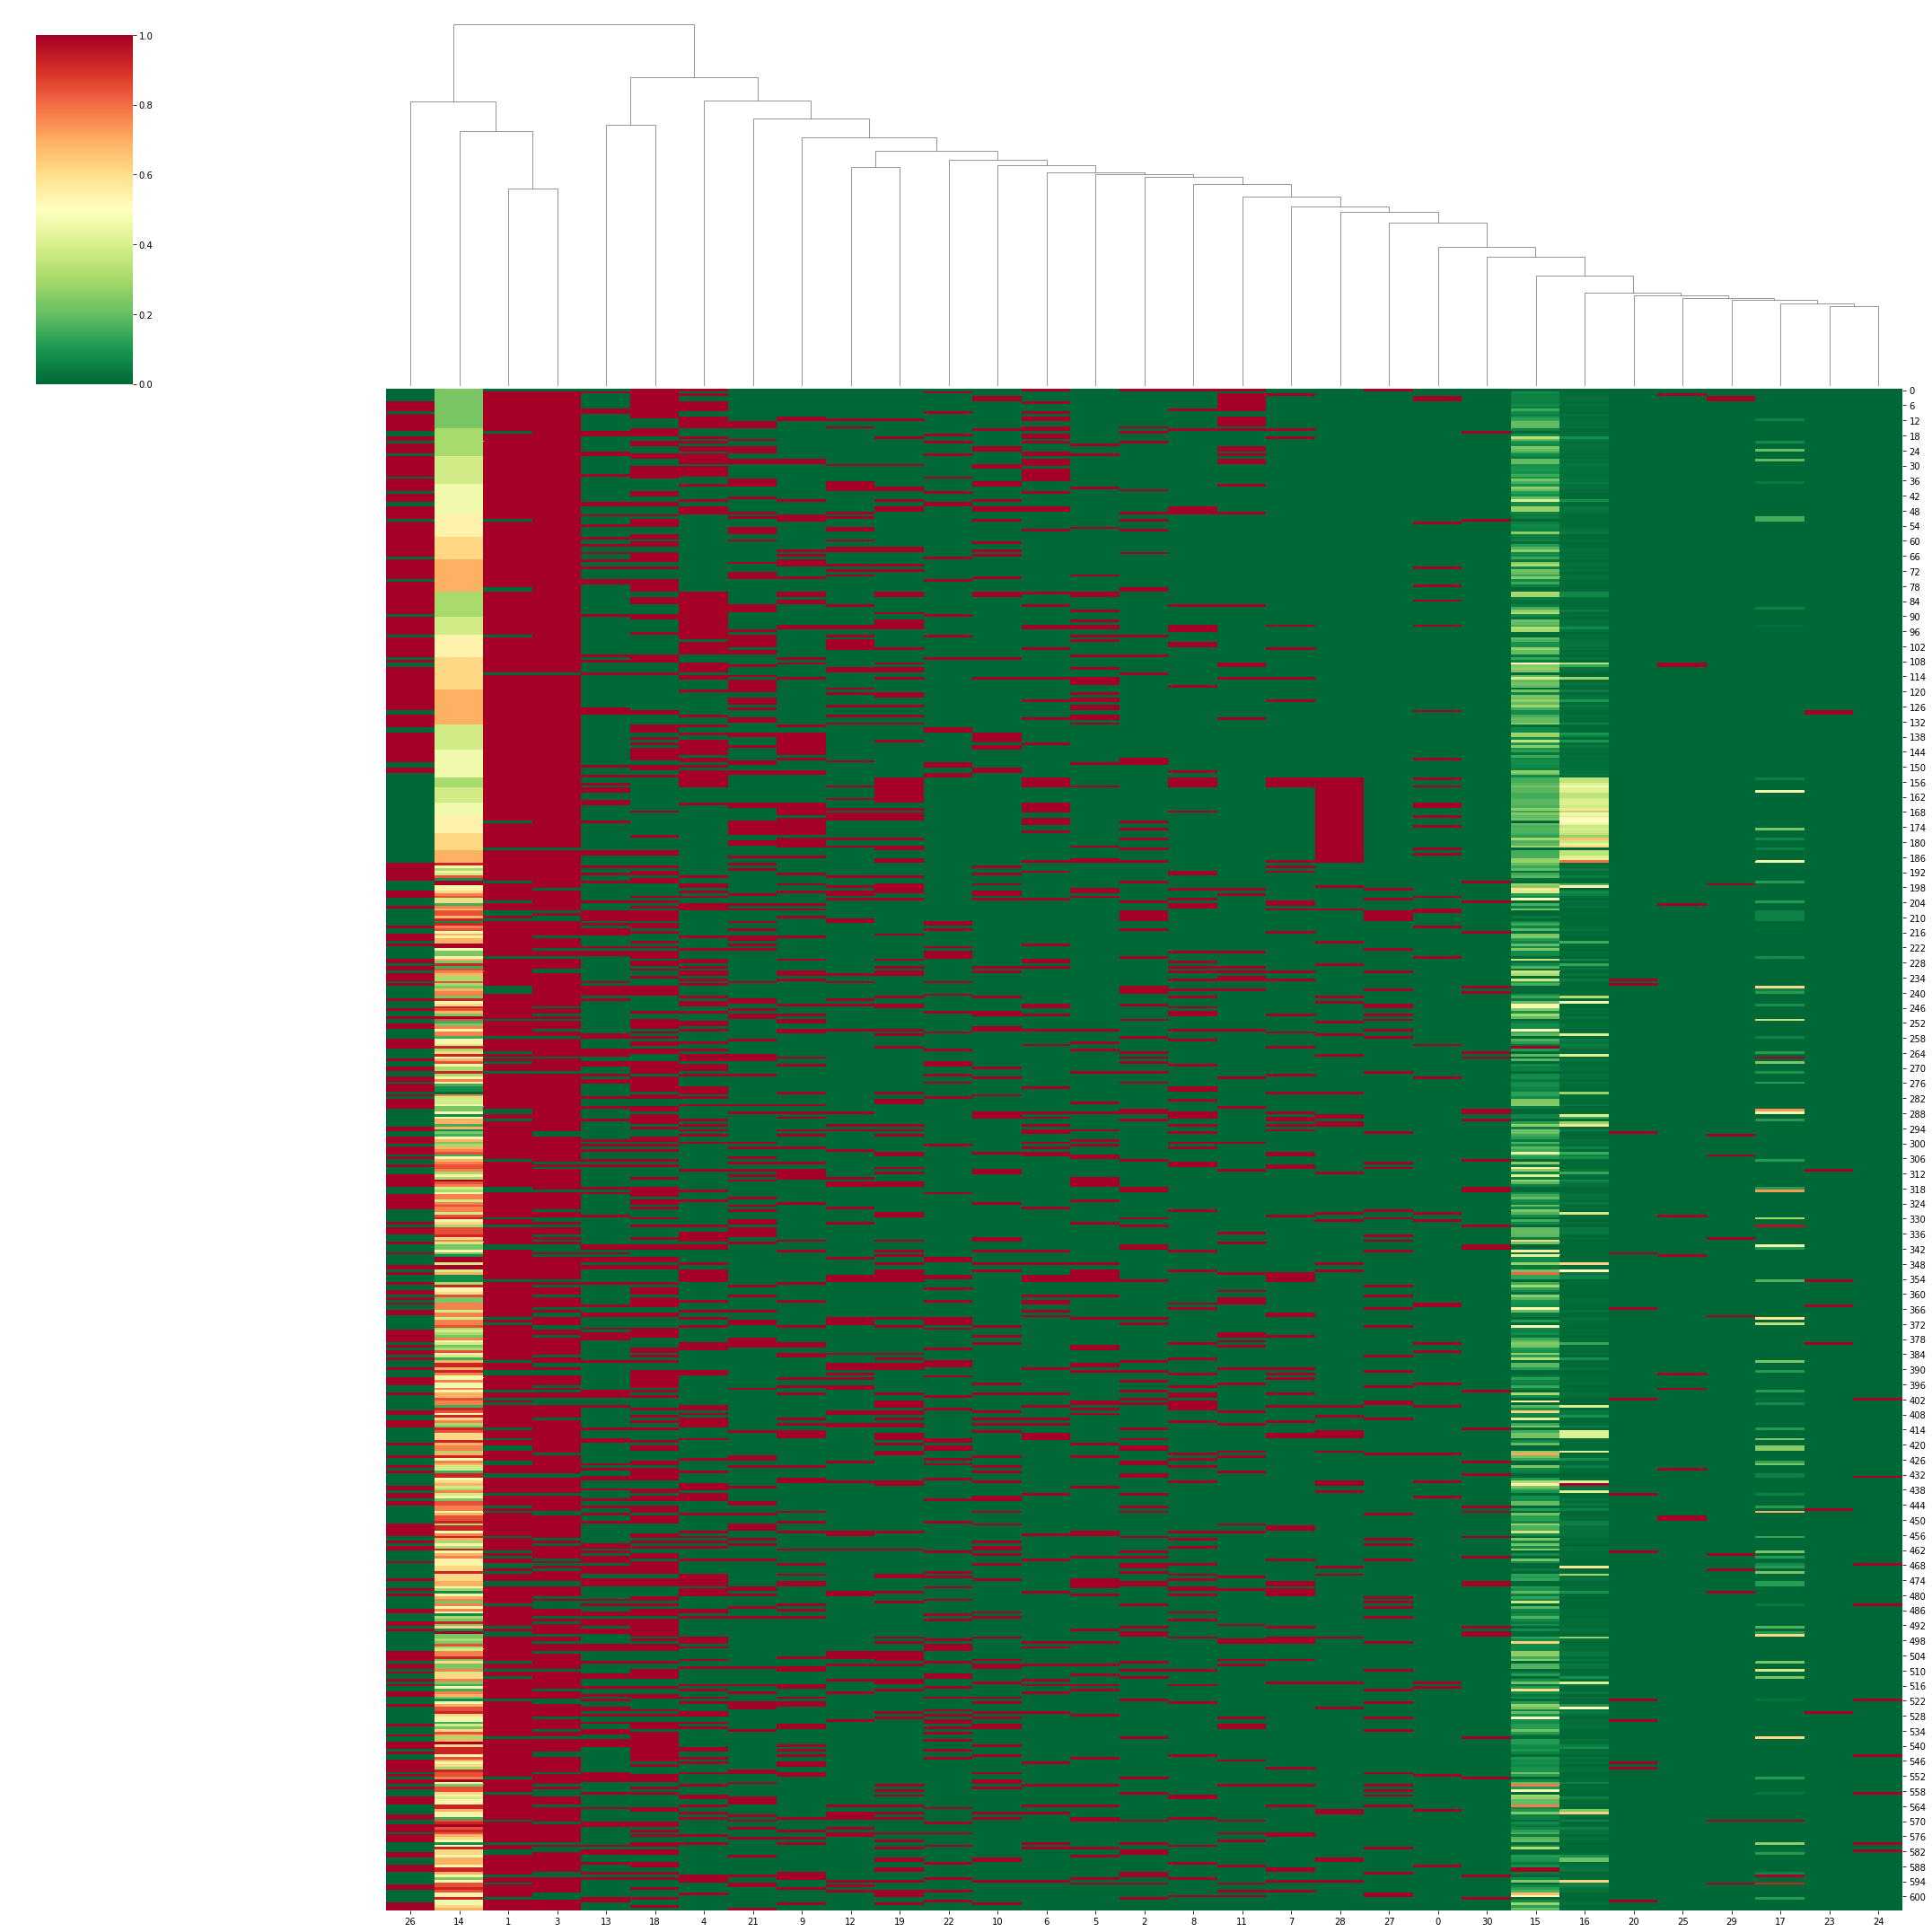

In [ ]:
sns.clustermap(data_num, cmap='RdYlGn_r', figsize=(15,15), row_cluster=False)


##Visual Analysis: Clusters versus Gender/CondSocialCirc - from Kmeans... pendente avaliar

In [ ]:
df = pd.DataFrame(list(model.centroids.values()))

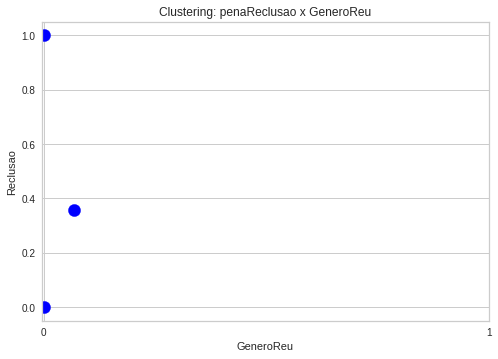

In [ ]:
plt.scatter(df[0], df[4], s=150, c = 'blue')
plt.title('Clustering: penaReclusao x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('Reclusao')
plt.xticks(range(0,2))
plt.show()

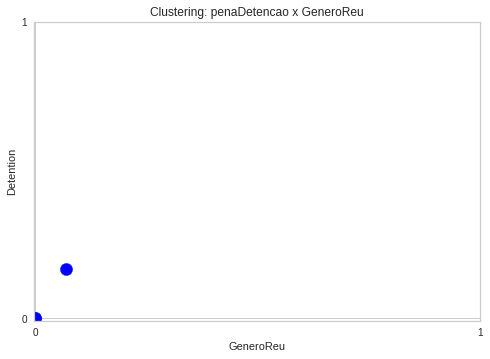

In [ ]:
plt.scatter(df[0], df[2], s=150, c = 'blue')
plt.title('Clustering: penaDetencao x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('Detention')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

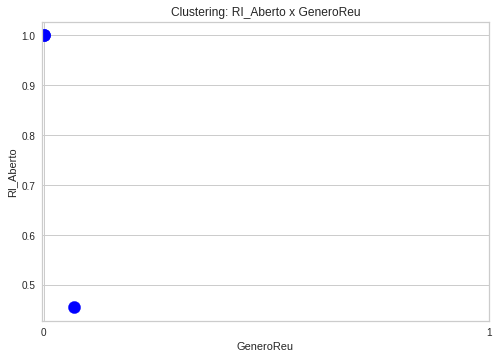

In [ ]:
plt.scatter(df[0], df[18], s=150, c = 'blue')
plt.title('Clustering: RI_Aberto x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('RI_Aberto')
plt.xticks(range(0,2))
plt.show()

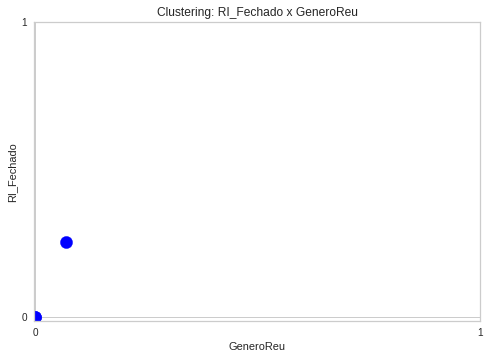

In [ ]:
plt.scatter(df[0], df[19], s=150, c = 'blue')
plt.title('Clustering: RI_Fechado x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('RI_Fechado')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

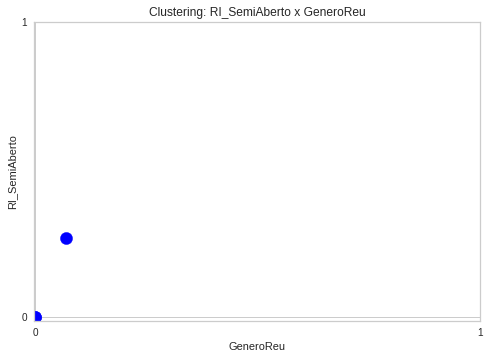

In [ ]:
plt.scatter(df[0], df[21], s=150, c = 'blue')
plt.title('Clustering: RI_SemiAberto x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('RI_SemiAberto')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

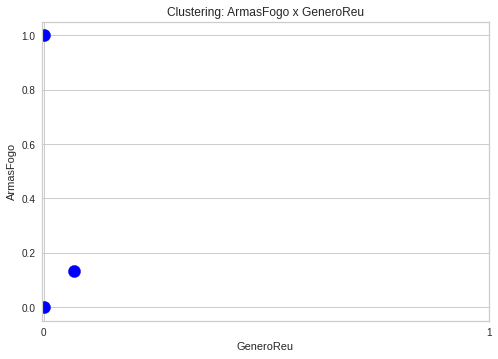

In [ ]:
plt.scatter(df[0], df[22], s=150, c = 'blue')
plt.title('Clustering: ArmasFogo x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('ArmasFogo')
plt.xticks(range(0,2))
plt.show()

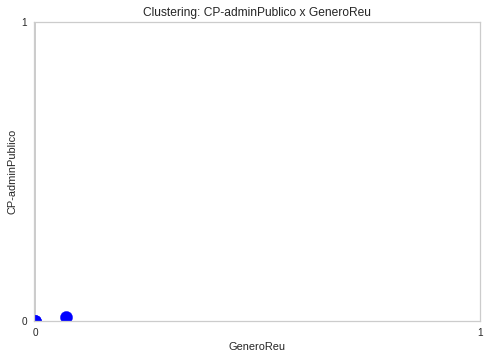

In [ ]:
plt.scatter(df[0], df[23], s=150, c = 'blue')
plt.title('Clustering: CP-adminPublico x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('CP-adminPublico')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

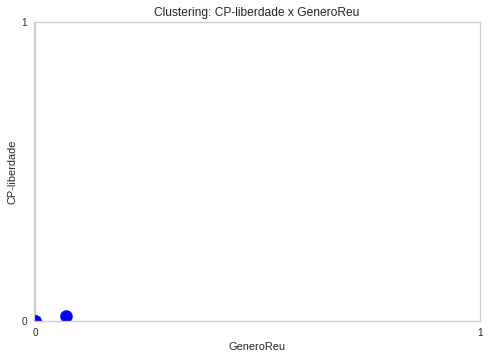

In [ ]:
plt.scatter(df[0], df[24], s=150, c = 'blue')
plt.title('Clustering: CP-liberdade x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('CP-liberdade')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

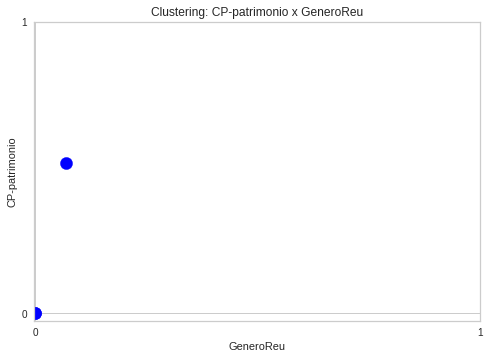

In [ ]:
plt.scatter(df[0], df[26], s=150, c = 'blue')
plt.title('Clustering: CP-patrimonio x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('CP-patrimonio')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

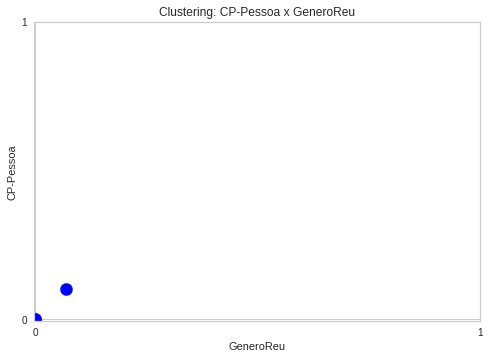

In [ ]:
plt.scatter(df[0], df[27], s=150, c = 'blue')
plt.title('Clustering: CP-Pessoa x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('CP-Pessoa')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

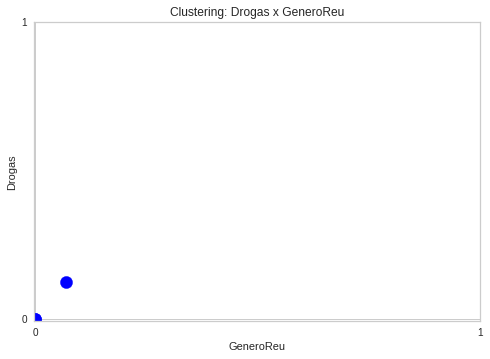

In [ ]:
plt.scatter(df[0], df[28], s=150, c = 'blue')
plt.title('Clustering: Drogas x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('Drogas')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

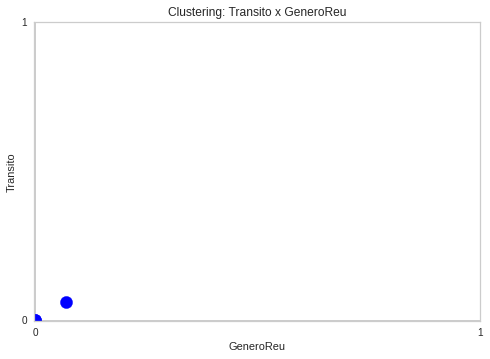

In [ ]:
plt.scatter(df[0], df[30], s=150, c = 'blue')
plt.title('Clustering: Transito x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('Transito')
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.show()

In [ ]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 12))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

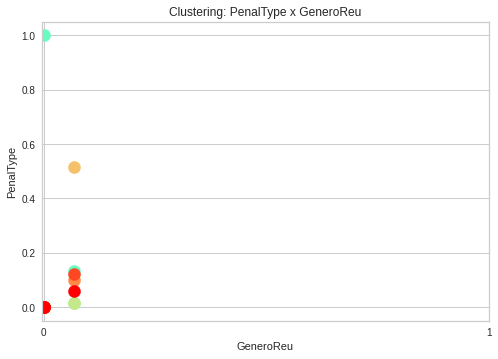

In [ ]:
plt.scatter(df[0], df[22], s=150, c = colors[5])
plt.scatter(df[0], df[23], s=150, c = colors[6])
plt.scatter(df[0], df[24], s=150, c = colors[7])
plt.scatter(df[0], df[26], s=150, c = colors[8])
plt.scatter(df[0], df[27], s=150, c = colors[9])
plt.scatter(df[0], df[28], s=150, c = colors[10])
plt.scatter(df[0], df[30], s=150, c = colors[11])

plt.title('Clustering: PenalType x GeneroReu')
plt.xlabel('GeneroReu')
plt.ylabel('PenalType')
plt.xticks(range(0,2))

plt.show()

A apresentação do gráfico acima, mesclando os clusters de todos os tipos penais, sugere que todos os clusters seguem a influência das amostras masculinas (observar que foi convencionado que Gender=0 é masculino), indicando que todos os tipos penais analisados são mais sentenciados à reus homens ou, mais explicado, que o desbalanceamento dos dados para casos em que os reus são homens (9/1) domina a definição de clusters pelo algoritmo.